# Analysing NHS Data with Python


# What is Pandas?

* **Pandas** is a popular Python package for data analysis, data cleaning, and data manipulation. It is used in a variety of data engineering, data analytics, and data science roles.
* Pandas provides the core component of the Dataframe, a way of storing tabular structured data in a table.
* Pandas is conventionally imported with the alias 'pd'.
* Pandas is almost always used with two other Python packages which provide useful utilities:
* * **NumPy**, which proviudes various numerical and mathematical abilities, imported as 'np'.
* * **Matplotlib.pyplot**, which is a graphing package, imported as 'plt'.

## What is Time Series Data?

**Defining time series data:**
* Data is measured sequentially and (typically) equally spaced in time.
* Time units and granularity vary - from once per month to once per second.
* Each time unit has at most one data measurement
* **Common Time Series Data Analysis Goals:**
  * Identify patterns that explain the behaviour of time series.
  * Predict new values for the future (forecasting)


## Importing NHS Accident and Emergency Data from CSV

The data used throughout this notebook is derived from monthly summary statistics on Accident and Emergency department waiting times throughout the UK from Mid 2018 - Apr 2025.

In [1]:
# Connect to your Google Drive if using Colab
# from google.colab import drive
# drive.mount('/content/gdrive')

# Necessary Packages for reading data
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# Change to reflect your folder
folder_path = "/content/gdrive/MyDrive/Freelance Work/MultiVerse/Python Sessions/NHS Data Analysis Python/CSVData"
folder_path = "./Data"
# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read each CSV into a DataFrame and put into a list
df_list = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames in the list into one
aedata = pd.concat(df_list, ignore_index=True)

## Dataframes: a Brief Introduction

* The dataframe is the fundamental component of Pandas that we will be working with. It's essentially a table.
* Dataframe elements:
* * **Index:** This serves as the "row labels" or identifiers for each row of data. By default, the index is a sequence of integers starting from 0, but you can customize it to be any set of values or labels.
* * **Columns:** Columns are the named components of a DataFrame, and they represent the variables or attributes of the data. Each column has a unique label, and you can access and manipulate the data within each column. Best practice is tonot include any spaces - my_column_name or myColumnName are better than 'my column name'.
* * **Rows:** Rows are the individual records or observations in the DataFrame. Each row corresponds to a single data point and contains values for each column.
* * **Shape:** The shape of a DataFrame is represented as a tuple (n, m), where 'n' is the number of rows, and 'm' is the number of columns. You can access the shape of a DataFrame using the shape attribute.

### Some Necessary Jargon: Attributes, Methods, Functions

**Attributes:**  Attributes are like characteristics or properties of a dataframe. They provide information about the dataframe without changing it. For example, the "shape" attribute tells you the number of rows and columns in the dataframe, and the "columns" attribute lists the column names.

**Methods:** Methods are actions or operations you can perform on an object - for today, this object is most likely a Pandas DataFrame. They allow you to modify, analyze, or extract data from the dataframe. For example, the "head()" method displays the first few rows of the dataframe, and the "describe()" method provides summary statistics. They may take *parameters* inside the brackets which give the method extra information or instructions.

**Functions:** Functions are pieces of reusable code that perform specific tasks. In pandas, functions are often used to manipulate dataframes. You can use built-in functions or create custom functions to process and transform data within the dataframe. For example, the "mean()" function calculates the mean of a column, and you can create a custom function to clean and format your data. Functions may also take *parameters* inside the brackets which give the function extra information or instructions.

### Inspecting Your Data  

#### The .head() and .tail() methods
* .head(n) allows you to see 'n' rows at the top of your data.
* .tail(n) does the same, but at the bottom of your data.
* both default to five rows.

#### Useful Attributes
* .shape gives the number of rows and columns
* .columns returns a list of column names
* .dtypes returns the data types for each column

In [3]:
aedata.head(5)

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Number of A&E attendances Other A&E Department,Number of attendances over 4hrs Type 1,Number of attendances over 4hrs Type 2,Number of attendances over 4hrs Other A&E Department,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
0,MSitAE-APRIL-2020,Y02572,NHS ENGLAND NORTH EAST AND YORKSHIRE,PARK COMMUNITY PRACTICE,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSitAE-APRIL-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,833.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSitAE-APRIL-2020,Y02532,NHS ENGLAND NORTH WEST,MIRIAM MINOR EMERGENCY,0.0,0.0,507.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSitAE-APRIL-2020,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,955.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
aedata.tail(5)

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Number of A&E attendances Other A&E Department,Number of attendances over 4hrs Type 1,Number of attendances over 4hrs Type 2,Number of attendances over 4hrs Other A&E Department,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
19509,MSitAE-SEPTEMBER-2023,RDE,NHS ENGLAND EAST OF ENGLAND,EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST,14022.0,0.0,11234.0,6256.0,0.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19510,MSitAE-SEPTEMBER-2023,RFS,NHS ENGLAND MIDLANDS,CHESTERFIELD ROYAL HOSPITAL NHS FOUNDATION TRUST,7011.0,0.0,1108.0,2369.0,0.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19511,MSitAE-SEPTEMBER-2023,G0Q0L,NHS ENGLAND LONDON,BARKING HOSPITAL UTC,0.0,0.0,2121.0,0.0,0.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19512,MSitAE-SEPTEMBER-2023,K6K0R,NHS ENGLAND LONDON,HAROLD WOOD POLYCLINIC UTC,0.0,0.0,2111.0,0.0,0.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19513,Total,Total,Total,Total,1344730.0,42135.0,716971.0,573540.0,1738.0,31799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Some lesser-known head() and tail() parameter options
aedata.head(-10)   # all but the last 10 rows
aedata.tail(-5)   # all but the first 5 rows

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Number of A&E attendances Other A&E Department,Number of attendances over 4hrs Type 1,Number of attendances over 4hrs Type 2,Number of attendances over 4hrs Other A&E Department,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
5,MSitAE-APRIL-2020,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0.0,0.0,743.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MSitAE-APRIL-2020,Y03218,NHS ENGLAND LONDON,THE PINN UNREGISTERED WIC,0.0,0.0,1075.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MSitAE-APRIL-2020,RLQ,NHS ENGLAND MIDLANDS,WYE VALLEY NHS TRUST,2860.0,0.0,0.0,297.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MSitAE-APRIL-2020,Y02973,NHS ENGLAND LONDON,KINGS PARK SURGERY,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MSitAE-APRIL-2020,REF,NHS ENGLAND SOUTH WEST,ROYAL CORNWALL HOSPITALS NHS TRUST,2495.0,0.0,4340.0,126.0,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19509,MSitAE-SEPTEMBER-2023,RDE,NHS ENGLAND EAST OF ENGLAND,EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST,14022.0,0.0,11234.0,6256.0,0.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19510,MSitAE-SEPTEMBER-2023,RFS,NHS ENGLAND MIDLANDS,CHESTERFIELD ROYAL HOSPITAL NHS FOUNDATION TRUST,7011.0,0.0,1108.0,2369.0,0.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19511,MSitAE-SEPTEMBER-2023,G0Q0L,NHS ENGLAND LONDON,BARKING HOSPITAL UTC,0.0,0.0,2121.0,0.0,0.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19512,MSitAE-SEPTEMBER-2023,K6K0R,NHS ENGLAND LONDON,HAROLD WOOD POLYCLINIC UTC,0.0,0.0,2111.0,0.0,0.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# The Shape attribute lets you see the number of rows and columns
aedata.shape

(19514, 34)

In [7]:
# The columns attribute returns the column headers as a list
aedata.columns

Index(['Period', 'Org Code', 'Parent Org', 'Org name',
       'A&E attendances Type 1', 'A&E attendances Type 2',
       'A&E attendances Other A&E Department', 'Attendances over 4hrs Type 1',
       'Attendances over 4hrs Type 2',
       'Attendances over 4hrs Other Department',
       'Patients who have waited 4-12 hs from DTA to admission',
       'Patients who have waited 12+ hrs from DTA to admission',
       'Emergency admissions via A&E - Type 1',
       'Emergency admissions via A&E - Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency admissions',
       'A&E attendances Booked Appointments Type 1',
       'A&E attendances Booked Appointments Type 2',
       'A&E attendances Booked Appointments Other Department',
       'Attendances over 4hrs Booked Appointments Type 1',
       'Attendances over 4hrs Booked Appointments Type 2',
       'Attendances over 4hrs Booked Appointments Other Department',
       'Number of A&E attendances Type

In [8]:
# The dtypes attribute gives the data type for each column
# It's very important for data to have the correct data type
aedata.dtypes

Period                                                         object
Org Code                                                       object
Parent Org                                                     object
Org name                                                       object
A&E attendances Type 1                                        float64
A&E attendances Type 2                                        float64
A&E attendances Other A&E Department                          float64
Attendances over 4hrs Type 1                                  float64
Attendances over 4hrs Type 2                                  float64
Attendances over 4hrs Other Department                        float64
Patients who have waited 4-12 hs from DTA to admission          int64
Patients who have waited 12+ hrs from DTA to admission          int64
Emergency admissions via A&E - Type 1                           int64
Emergency admissions via A&E - Type 2                           int64
Emergency admissions

## Selecting Data from your Dataframe

* Sometimes, you don't want to see the whole dataframe - there are many options for seeing just one column, or a subset of columns.
* Using Boolean Masks
* Using the .drop() method to delete columns
* There are also ways to filter the rows that you see in a dataframe.
* You can use these methods and the assignment operator `=` to 'save' these filtered dataframes as new dataframe objects.

#### Accessing one Column: [ ]
* This only requires one square bracket and returns a Pandas Series.

#### Accessing More than One Column: [[ ]]
* This requires two brackets as it is technically inputting a list, which is defined as being a comma separated list of values between square brackets `[ ]`
* This returns a dataframe.

In [9]:
aedata['A&E attendances Booked Appointments Other Department'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: A&E attendances Booked Appointments Other Department, dtype: float64

In [10]:
aedata[['Org name',"A&E attendances Type 1",'Attendances over 4hrs Type 1']].head()

,Org name,A&E attendances Type 1,Attendances over 4hrs Type 1
0,PARK COMMUNITY PRACTICE,0.0,0.0
1,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0
2,WOKING WALK IN CENTRE,0.0,0.0
3,MIRIAM MINOR EMERGENCY,0.0,0.0
4,ASHFORD WALK-IN-CENTRE,0.0,0.0


In [11]:
# assigning the data subset to a new variable name creates a new dataset but leaves the original unchanged
aedata_type1 = aedata[['Org name',
                       'A&E attendances Type 1',
                       'Attendances over 4hrs Type 1',
                       'A&E attendances Booked Appointments Type 1',
                       'Attendances over 4hrs Booked Appointments Type 1',
                       'Emergency admissions via A&E - Type 1']]

aedata_type1.head(5)

,Org name,A&E attendances Type 1,Attendances over 4hrs Type 1,A&E attendances Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 1,Emergency admissions via A&E - Type 1
0,PARK COMMUNITY PRACTICE,0.0,0.0,NaN,NaN,0
1,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,NaN,NaN,0
2,WOKING WALK IN CENTRE,0.0,0.0,NaN,NaN,0
3,MIRIAM MINOR EMERGENCY,0.0,0.0,NaN,NaN,0
4,ASHFORD WALK-IN-CENTRE,0.0,0.0,NaN,NaN,0


In [12]:
# Assign to the same variable name to change the dataset persistently
aedata_type1 = aedata_type1.drop('Emergency admissions via A&E - Type 1', axis = 1)

aedata_type1.head(5)

,Org name,A&E attendances Type 1,Attendances over 4hrs Type 1,A&E attendances Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 1
0,PARK COMMUNITY PRACTICE,0.0,0.0,NaN,NaN
1,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,NaN,NaN
2,WOKING WALK IN CENTRE,0.0,0.0,NaN,NaN
3,MIRIAM MINOR EMERGENCY,0.0,0.0,NaN,NaN
4,ASHFORD WALK-IN-CENTRE,0.0,0.0,NaN,NaN


## The .drop() method
* Doesn't require you to assign to a the same variable to make changes persistent- drops columns in place
* Drops rows if axis is specified as 0, columns if axis is specified as 1

In [13]:
# Drop a single row
ae_data_first_row_dropped = aedata.drop(0, axis = 0)
ae_data_first_row_dropped.head()

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Number of A&E attendances Other A&E Department,Number of attendances over 4hrs Type 1,Number of attendances over 4hrs Type 2,Number of attendances over 4hrs Other A&E Department,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSitAE-APRIL-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,833.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSitAE-APRIL-2020,Y02532,NHS ENGLAND NORTH WEST,MIRIAM MINOR EMERGENCY,0.0,0.0,507.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSitAE-APRIL-2020,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,955.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MSitAE-APRIL-2020,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0.0,0.0,743.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop a single column
aedata.drop('Unnamed: 22', axis = 1)

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Number of A&E attendances Type 2,Number of A&E attendances Other A&E Department,Number of attendances over 4hrs Type 1,Number of attendances over 4hrs Type 2,Number of attendances over 4hrs Other A&E Department,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
0,MSitAE-APRIL-2020,Y02572,NHS ENGLAND NORTH EAST AND YORKSHIRE,PARK COMMUNITY PRACTICE,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSitAE-APRIL-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,833.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSitAE-APRIL-2020,Y02532,NHS ENGLAND NORTH WEST,MIRIAM MINOR EMERGENCY,0.0,0.0,507.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSitAE-APRIL-2020,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,955.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19509,MSitAE-SEPTEMBER-2023,RDE,NHS ENGLAND EAST OF ENGLAND,EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST,14022.0,0.0,11234.0,6256.0,0.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19510,MSitAE-SEPTEMBER-2023,RFS,NHS ENGLAND MIDLANDS,CHESTERFIELD ROYAL HOSPITAL NHS FOUNDATION TRUST,7011.0,0.0,1108.0,2369.0,0.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19511,MSitAE-SEPTEMBER-2023,G0Q0L,NHS ENGLAND LONDON,BARKING HOSPITAL UTC,0.0,0.0,2121.0,0.0,0.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19512,MSitAE-SEPTEMBER-2023,K6K0R,NHS ENGLAND LONDON,HAROLD WOOD POLYCLINIC UTC,0.0,0.0,2111.0,0.0,0.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Columns to clean [blank or index incorrectly imported as data]
# Notice that this is defined as a list - you can drop mutliple columns at once
cols = ['Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'a']

# Drop columns to clean out of dataset
aedata.drop(cols, axis = 1, inplace = True)

## Dealing with Duplicates and Blanks

In data analysis, duplicate data and blank entries (often appearing as `NaN` values - 'not a number') can often cause problems. That's why it's best to deal with these at the outset.

In [16]:
aedata = aedata.drop_duplicates()

aedata_orgs = aedata.drop_duplicates(subset="Org name")          # drop based only on 'Org name'- drops any duplicates
aedata_orgs_periods = aedata.drop_duplicates(subset=["Org name","Period"]) # drop based on both columns in the list - if duplicates in both

aedata_keepfirst = aedata.drop_duplicates(keep='first')  # keep first duplicate
aedata_keeplast = aedata.drop_duplicates(keep='last')   # keep last duplicate
aedata_dropall = aedata.drop_duplicates(keep=False)    # remove all duplicates

aedata.drop_duplicates(inplace=True)  # modifies df and returns 'None' as default
aedata_newdf = aedata.drop_duplicates(inplace=False)  # returns new df

# False = preserves the existing index values.
# True = resets index to 0...n-1.
# This is handy after dropping rows, so you don’t end up with “holes” in the index.
aedata_newindex = aedata.drop_duplicates(ignore_index=True)

In [17]:
# Drop any row with at least one NaN
aedata_nonulls = aedata.dropna()

# Drop rows where 'Org name' is NaN
aedata_orgs_nonulls = aedata.dropna(subset=["Org name"])

# Drop rows where either 'Org name' or 'Period' are NaN
aedata_orgs_periods_nonulls = aedata.dropna(subset=["Org name","Period"])

# Drop rows where ALL values are NaN (safe way to clean completely empty rows)
aedata_allnonulls = aedata.dropna(how="all")

# Drop rows only if ALL of the listed columns are NaN
aedata_orgs_periods_allnonulls = aedata.dropna(subset=["Org name","Period"], how="all")

# Control threshold: keep rows with at least 2 non-NaN values
aedata_thresh = aedata.dropna(thresh=2)

# inplace modifies df and returns 'None'
aedata_nonulls.dropna(inplace=True)

# ignore_index works the same way as with drop_duplicates
aedata_newindex = aedata.dropna(ignore_index=True)


C:\Users\laura\AppData\Local\Temp\ipykernel_22500\3462746481.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aedata_nonulls.dropna(inplace=True)


### Identifying Blanks
* .isna() returns either true or false depending on whether there are nulls.
* .any() specifies that if there are any nulls, include in the mask
* .sum() sums up the number of null values

In [18]:
# Boolean mask for rows with ANY NaN
mask_anynulls = aedata.isna().any(axis=1)

# Get only rows with NaN in 'Org name'
aedata_orgs_nulls = aedata[aedata["Org name"].isna()]
aedata_orgs_nulls

# Count total missing per column
null_counts = aedata.isna().sum()
null_counts

Period                                                           12
Org Code                                                         12
Parent Org                                                       12
Org name                                                          0
A&E attendances Type 1                                         5695
A&E attendances Type 2                                         5695
A&E attendances Other A&E Department                           5695
Attendances over 4hrs Type 1                                   5695
Attendances over 4hrs Type 2                                   5695
Attendances over 4hrs Other Department                         5695
Patients who have waited 4-12 hs from DTA to admission            0
Patients who have waited 12+ hrs from DTA to admission            0
Emergency admissions via A&E - Type 1                             0
Emergency admissions via A&E - Type 2                             0
Emergency admissions via A&E - Other A&E departm

### Fill or Replace blank values

In [19]:
# Replace all NaN with a single value
aedata_filled = aedata.fillna("Unknown")

# Replace NaN in one column only
aedata["Org name"] = aedata["Org name"].fillna("Missing Org")

# Fill NaN with forward fill (propagate previous value down)
aedata_ffill = aedata.ffill()

# Fill NaN with backward fill (propagate next value up)
aedata_bfill = aedata.bfill()

# Fill NaN with column mean (common for numeric data)
#aedata["Value"] = aedata["Value"].fillna(aedata["Value"].mean())


## Managing Duplicated Data Columns using Coalesce Duplicates

Viewing the data's columns, we notice some duplication of data categories:
* Number of A&E attendances Type 1 = A&E attendances Type 1
* Number of A&E attendances Type 2 = A&E attendances Type 2

This indicates that the data specification shifted at some point in time; we can merge the data together so that if one column has a blank, it fills in the corresponding value from its duplicate column.

In [20]:
# Mapping of "original" column = "duplicate" column
pairs = {
    "A&E attendances Type 1": "Number of A&E attendances Type 1",
    "A&E attendances Type 2": "Number of A&E attendances Type 2",
    "A&E attendances Other A&E Department": "Number of A&E attendances Other A&E Department",
    "Attendances over 4hrs Type 1": "Number of attendances over 4hrs Type 1",
    "Attendances over 4hrs Type 2": "Number of attendances over 4hrs Type 2",
    "Attendances over 4hrs Other Department": "Number of attendances over 4hrs Other A&E Department",
}

# For each pair, fill blanks in the first column with values from the duplicate
for original, dup in pairs.items():
    if original in aedata.columns and dup in aedata.columns:
        aedata[original] = aedata[original].fillna(aedata[dup])

# Drop the duplicate columns afterwards
aedata = aedata.drop(columns=pairs.values(), errors="ignore")

aedata.head()

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department
0,MSitAE-APRIL-2020,Y02572,NHS ENGLAND NORTH EAST AND YORKSHIRE,PARK COMMUNITY PRACTICE,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,MSitAE-APRIL-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,833.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,MSitAE-APRIL-2020,Y02532,NHS ENGLAND NORTH WEST,MIRIAM MINOR EMERGENCY,0.0,0.0,507.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,MSitAE-APRIL-2020,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,955.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

'Feature Engineering' refers to using existing data to create new data. This is easily achievable in Python as operations are applied to columns as a whole. For example, `column1` - `column2` produces a new column in which each row value is the corresponding row value of column 2 subtracted from columns 1.

In [21]:
# Add a column with the proportion of over 4h wait times using a simple calculation.
# dataset[newcolname] = dataset[col] * - / + dataset [col2]

aedata['Proportion Waiting over 4h'] = aedata['Attendances over 4hrs Type 1']/aedata["A&E attendances Type 1"]

aedata['Proportion Waiting over 4h'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Proportion Waiting over 4h, dtype: float64

In [22]:
# Step 1: Split Period into parts
# We use the format: PREFIX-MONTH-YEAR and split using hyphens
aedata[["prefix", "Month", "Year"]] = aedata["Period"].str.split("-", expand=True)

# Step 2: Create a proper date (day=01 + first three letters of month + year)
aedata["Date"] = pd.to_datetime(
    "01-" + aedata["Month"].str.title().str[:3] + "-" + aedata["Year"],
    format="%d-%b-%Y"
)

# Step 3: Drop prefix if you don’t need it
aedata = aedata.drop(columns="prefix")

aedata[['Period', 'Date']].head()

,Period,Date
0,MSitAE-APRIL-2020,2020-04-01
1,MSitAE-APRIL-2020,2020-04-01
2,MSitAE-APRIL-2020,2020-04-01
3,MSitAE-APRIL-2020,2020-04-01
4,MSitAE-APRIL-2020,2020-04-01


## Renaming Columns



In [23]:
# List of covid-era columns
covid_cols = [
    "A&E attendances Booked Appointments Type 1",
    "A&E attendances Booked Appointments Type 2",
    "A&E attendances Booked Appointments Other Department",
    "Attendances over 4hrs Booked Appointments Type 1",
    "Attendances over 4hrs Booked Appointments Type 2",
    "Attendances over 4hrs Booked Appointments Other Department",
    "Patients who have waited 4-12 hs from DTA to admission",
    "Patients who have waited 12+ hrs from DTA to admission",
]

# Loop through the covid-era columns
for col in covid_cols:
    # Only rename if the column actually exists in the dataframe
    if col in aedata.columns:
        new_name = col + " (Covid-era)"
        aedata = aedata.rename(columns={col: new_name})

aedata.columns

Index(['Period', 'Org Code', 'Parent Org', 'Org name',
       'A&E attendances Type 1', 'A&E attendances Type 2',
       'A&E attendances Other A&E Department', 'Attendances over 4hrs Type 1',
       'Attendances over 4hrs Type 2',
       'Attendances over 4hrs Other Department',
       'Patients who have waited 4-12 hs from DTA to admission (Covid-era)',
       'Patients who have waited 12+ hrs from DTA to admission (Covid-era)',
       'Emergency admissions via A&E - Type 1',
       'Emergency admissions via A&E - Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency admissions',
       'A&E attendances Booked Appointments Type 1 (Covid-era)',
       'A&E attendances Booked Appointments Type 2 (Covid-era)',
       'A&E attendances Booked Appointments Other Department (Covid-era)',
       'Attendances over 4hrs Booked Appointments Type 1 (Covid-era)',
       'Attendances over 4hrs Booked Appointments Type 2 (Covid-era)',
       'Attendances ove

## Filtering Your Data

* Essential for cleaning up data and creating sub-datasets from an original dataset.
* Can use`isin()` method, to filter data to create different granularity datasets.

### Checking Columns for Aggregates

* NHS Data has a habit of including totals and sums in their datasets which can mess up calculations.
* `unique()` and `value_counts` are useful tools for detecting these.

In [24]:
print(aedata["Org name"].unique())

print(aedata["Parent Org"].unique())

['PARK COMMUNITY PRACTICE'
 'DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDATION TRUST'
 'WOKING WALK IN CENTRE' 'MIRIAM MINOR EMERGENCY' 'ASHFORD WALK-IN-CENTRE'
 'PHL LYMINGTON UTC' 'THE PINN UNREGISTERED WIC' 'WYE VALLEY NHS TRUST'
 'KINGS PARK SURGERY' 'ROYAL CORNWALL HOSPITALS NHS TRUST'
 'SOUTHAMPTON NHS TREATMENT CENTRE' 'NOTTINGHAM CITYCARE PARTNERSHIP'
 'HOMERTON UNIVERSITY HOSPITAL NHS FOUNDATION TRUST'
 'MARKET HARBOROUGH MED.CTR' 'NORTHERN DEVON HEALTHCARE NHS TRUST'
 'DORSET HEALTHCARE UNIVERSITY NHS FOUNDATION TRUST'
 'KENT COMMUNITY HEALTH NHS FOUNDATION TRUST'
 'LATHAM HOUSE MEDICAL PRACTICE' 'TETBURY HOSPITAL TRUST LTD'
 'SOUTH BIRMINGHAM GP WALK IN CENTRE' 'EAST BERKS PRIMARY CARE OOH(WAM)'
 'HAROLD WOOD WIC' 'SOUTHERN HEALTH NHS FOUNDATION TRUST'
 'LIVERPOOL HEART AND CHEST HOSPITAL NHS FOUNDATION TRUST'
 'PAULTON MEMORIAL HOSPITAL' 'SKELMERSDALE WALK IN CENTRE'
 'EXMOUTH MINOR INJURY UNIT' 'OAKHAM MEDICAL PRACTICE'
 'BUCKINGHAMSHIRE HEALTHCARE NHS TRUST'
 'YEOVIL DI

In [25]:
print(aedata["Org name"].value_counts())

print(aedata["Parent Org"].value_counts())

Org name
NORTHAMPTON GENERAL HOSPITAL NHS TRUST               88
COUNTESS OF CHESTER HOSPITAL NHS FOUNDATION TRUST    88
IMPERIAL COLLEGE HEALTHCARE NHS TRUST                88
EAST RIDING COMMUNITY HOSPITAL                       88
KETTERING GENERAL HOSPITAL NHS FOUNDATION TRUST      88
                                                     ..
Total                                                 1
HERNE BAY HEALTH CARE LTD                             1
NEMS CBS (UTC)                                        1
TOTAl                                                 1
TOTAL                                                 1
Name: count, Length: 311, dtype: int64
Parent Org
NHS ENGLAND MIDLANDS                                                   2786
NHS ENGLAND LONDON                                                     2493
NHS ENGLAND SOUTH EAST                                                 2282
NHS ENGLAND NORTH EAST AND YORKSHIRE                                   1935
NHS ENGLAND NORTH WES

In [26]:
# Using lists to define different granularity datasets
# These lists also filter out the 'Total' and 'NaN' values

major_regions = ['NHS ENGLAND MIDLANDS ',
 'NHS ENGLAND LONDON',
 'NHS ENGLAND EAST OF ENGLAND ',
 'NHS ENGLAND SOUTH EAST ',
 'NHS ENGLAND NORTH WEST ',
 'NHS ENGLAND NORTH EAST AND YORKSHIRE ',
 'NHS ENGLAND SOUTH WEST ']

sub_regions = ['NHS ENGLAND NORTH WEST (CHESHIRE AND MERSEYSIDE)',
 'NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH)',
 'NHS ENGLAND SOUTH EAST (HAMPSHIRE, ISLE OF WIGHT AND THAMES VALLEY)',
 'NHS ENGLAND MIDLANDS (NORTH MIDLANDS)',
 'NHS ENGLAND MIDLANDS (CENTRAL MIDLANDS)',
 'NHS ENGLAND SOUTH EAST (KENT, SURREY AND SUSSEX)',
 'NHS ENGLAND NORTH EAST AND YORKSHIRE (YORKSHIRE AND HUMBER)',
 'NHS ENGLAND MIDLANDS (WEST MIDLANDS)',
 'NHS ENGLAND EAST OF ENGLAND (EAST)',
 'NHS ENGLAND SOUTH WEST (SOUTH WEST NORTH)',
 'NHS ENGLAND NORTH WEST (LANCASHIRE AND SOUTH CUMBRIA)',
 'NHS ENGLAND NORTH WEST (GREATER MANCHESTER)',
 'NHS ENGLAND NORTH EAST AND YORKSHIRE (CUMBRIA AND NORTH EAST)',
 'NHS ENGLAND MIDLANDS AND EAST (NORTH MIDLANDS)',
 'NHS ENGLAND MIDLANDS AND EAST (WEST MIDLANDS)',
 'NHS ENGLAND MIDLANDS AND EAST (CENTRAL MIDLANDS)',
 'NHS ENGLAND NORTH (CHESHIRE AND MERSEYSIDE)',
 'NHS ENGLAND NORTH (YORKSHIRE AND HUMBER)',
 'NHS ENGLAND NORTH (CUMBRIA AND NORTH EAST)',
 'NHS ENGLAND NORTH (LANCASHIRE AND SOUTH CUMBRIA)',
 'NHS ENGLAND NORTH (GREATER MANCHESTER)',
 'NHS ENGLAND MIDLANDS AND EAST (EAST)']

In [27]:
major_regions_aedata = aedata[aedata['Parent Org'].isin(major_regions)]

major_regions_aedata['Parent Org'].value_counts()

Parent Org
NHS ENGLAND MIDLANDS                     2786
NHS ENGLAND LONDON                       2493
NHS ENGLAND SOUTH EAST                   2282
NHS ENGLAND NORTH EAST AND YORKSHIRE     1935
NHS ENGLAND NORTH WEST                   1860
NHS ENGLAND SOUTH WEST                   1517
NHS ENGLAND EAST OF ENGLAND              1055
Name: count, dtype: int64

In [28]:
sub_regions_aedata = aedata[aedata['Parent Org'].isin(sub_regions)]
sub_regions_val_counts = sub_regions_aedata.value_counts('Parent Org')
sub_regions_val_counts

Parent Org
NHS ENGLAND SOUTH EAST (KENT, SURREY AND SUSSEX)                       503
NHS ENGLAND SOUTH EAST (HAMPSHIRE, ISLE OF WIGHT AND THAMES VALLEY)    392
NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH)                              386
NHS ENGLAND SOUTH WEST (SOUTH WEST NORTH)                              345
NHS ENGLAND NORTH (YORKSHIRE AND HUMBER)                               298
NHS ENGLAND MIDLANDS AND EAST (CENTRAL MIDLANDS)                       276
NHS ENGLAND NORTH EAST AND YORKSHIRE (YORKSHIRE AND HUMBER)            276
NHS ENGLAND EAST OF ENGLAND (EAST)                                     264
NHS ENGLAND NORTH (CHESHIRE AND MERSEYSIDE)                            233
NHS ENGLAND MIDLANDS AND EAST (WEST MIDLANDS)                          231
NHS ENGLAND NORTH WEST (CHESHIRE AND MERSEYSIDE)                       222
NHS ENGLAND MIDLANDS (WEST MIDLANDS)                                   218
NHS ENGLAND MIDLANDS (CENTRAL MIDLANDS)                                182
NHS ENGLAND MI

In [29]:
# Filtering for a specific value (string)

midlands_subset = major_regions_aedata[major_regions_aedata["Parent Org"] == "NHS ENGLAND MIDLANDS "]

midlands_subset.head()

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,A&E attendances Booked Appointments Type 1 (Covid-era),A&E attendances Booked Appointments Type 2 (Covid-era),A&E attendances Booked Appointments Other Department (Covid-era),Attendances over 4hrs Booked Appointments Type 1 (Covid-era),Attendances over 4hrs Booked Appointments Type 2 (Covid-era),Attendances over 4hrs Booked Appointments Other Department (Covid-era),Proportion Waiting over 4h,Month,Year,Date
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
7,MSitAE-APRIL-2020,RLQ,NHS ENGLAND MIDLANDS,WYE VALLEY NHS TRUST,2860.0,0.0,0.0,297.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.103846,APRIL,2020,2020-04-01
11,MSitAE-APRIL-2020,NR3,NHS ENGLAND MIDLANDS,NOTTINGHAM CITYCARE PARTNERSHIP,0.0,0.0,1171.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
13,MSitAE-APRIL-2020,C82009,NHS ENGLAND MIDLANDS,MARKET HARBOROUGH MED.CTR,0.0,0.0,85.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
17,MSitAE-APRIL-2020,C82038,NHS ENGLAND MIDLANDS,LATHAM HOUSE MEDICAL PRACTICE,0.0,0.0,69.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01


## Explorative Data Analysis

*   `.describe()` method gives standard statistics such as count, mean, standard deviation, quartiles and median [numerical cols only].
*   Each of these standard statistics can also be be returned individually.
*   `quantile()` method allows you to return percentiles. Note that this requires the decimal version of a percentile (e.g. 0.01 for 1%) and can also take a list, in which case it returns all percentiles in the list.


**Skewness**
* What it is: A measure of how asymmetric the data distribution is.
* Interpretation:
   *   0 = perfectly symmetric (like a bell curve).
   *   \> 0 (positive skew) - tail is longer on the right (more high outliers).
   *   < 0 (negative skew) = tail is longer on the left (more low outliers).
* Example: Income data often has positive skew because a few very high earners pull the distribution to the right.

**Kurtosis**
* What it is: A measure of how heavy or light the tails of a distribution are compared to a normal distribution. It’s about outliers and peakedness, not the average value.
* Inbterpretation:
* 0 = similar to a normal bell curve.
   * \> 0 ('leptokurtic') = heavier tails and a sharper peak = more outliers.
   * < 0 ('platykurtic') = lighter tails and flatter peak = fewer outliers.


In [30]:
major_regions_aedata['A&E attendances Type 1'].describe()

count    13928.000000
mean      6283.292217
std       6491.208000
min          0.000000
25%          0.000000
50%       6050.000000
75%      10364.250000
max      36112.000000
Name: A&E attendances Type 1, dtype: float64

In [31]:
# === Location (where is the 'centre' of the data?) ===
print("Count (number of records): ", major_regions_aedata['A&E attendances Type 1'].count())
print("Mean (average): ", major_regions_aedata['A&E attendances Type 1'].mean())
print("Median (middle value): ", major_regions_aedata['A&E attendances Type 1'].median())
print("Mode (most common value):\n", major_regions_aedata['A&E attendances Type 1'].mode())

# === Spread (how spread out is the data?) ===
print("\nMinimum: ", major_regions_aedata['A&E attendances Type 1'].min())
print("Maximum: ", major_regions_aedata['A&E attendances Type 1'].max())
print("Standard Deviation (average distance from mean): ", major_regions_aedata['A&E attendances Type 1'].std())
print("Variance (std squared): ", major_regions_aedata['A&E attendances Type 1'].var())
print("Percentiles (1%, 10%, 25%, 60%, 99%):\n",
      major_regions_aedata['A&E attendances Type 1'].quantile([0.01, 0.1, 0.25, 0.6, 0.99]))

# === Shape / Relationships (what does the distribution look like?) ===
print("\nNumber of unique values: ", major_regions_aedata['A&E attendances Type 1'].nunique())
print("Skewness (left/right lean): ", major_regions_aedata['A&E attendances Type 1'].skew())
print("Kurtosis (peakedness / heavy tails): ", major_regions_aedata['A&E attendances Type 1'].kurtosis())


Count (number of records):  13928
Mean (average):  6283.292217116599
Median (middle value):  6050.0
Mode (most common value):
 0    0.0
Name: A&E attendances Type 1, dtype: float64

Minimum:  0.0
Maximum:  36112.0
Standard Deviation (average distance from mean):  6491.207999799933
Variance (std squared):  42135781.29666664
Percentiles (1%, 10%, 25%, 60%, 99%):
 0.01        0.00
0.10        0.00
0.25        0.00
0.60     7871.40
0.99    26529.42
Name: A&E attendances Type 1, dtype: float64

Number of unique values:  6402
Skewness (left/right lean):  0.9930632961174028
Kurtosis (peakedness / heavy tails):  1.1223839800204458


In [32]:
# The .agg method is great for multiple aggregations at once

major_regions_aedata["A&E attendances Type 1"].agg(["mean", "median", "std"])

mean      6283.292217
median    6050.000000
std       6491.208000
Name: A&E attendances Type 1, dtype: float64

## Grouping using `.groupby()`

The `groupby()` method lets you split your data into groups, apply a function to each group, then combine the results.

* Basic grouping: `groupby("Name of column with categories")`
* Add aggregation of choice to the end of the method to apply the aggregation to each group - E.g. `groupby("Name of column with categories").mean()`
* Also works with `.agg()`
* Two or more level grouping: `.groupby(['Country', 'Region', 'Sub-region'])` (order matters!)
* Outputs a groupby object, which can be made into a normal dataFrame using `reset_index()` - E.g.   `grouped = df.groupby(["Region", "Product"])["Sales"].mean().reset_index()`

In [33]:
aedata.head()

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,A&E attendances Booked Appointments Type 1 (Covid-era),A&E attendances Booked Appointments Type 2 (Covid-era),A&E attendances Booked Appointments Other Department (Covid-era),Attendances over 4hrs Booked Appointments Type 1 (Covid-era),Attendances over 4hrs Booked Appointments Type 2 (Covid-era),Attendances over 4hrs Booked Appointments Other Department (Covid-era),Proportion Waiting over 4h,Month,Year,Date
0,MSitAE-APRIL-2020,Y02572,NHS ENGLAND NORTH EAST AND YORKSHIRE,PARK COMMUNITY PRACTICE,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
1,MSitAE-APRIL-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,2626.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
2,MSitAE-APRIL-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,833.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
3,MSitAE-APRIL-2020,Y02532,NHS ENGLAND NORTH WEST,MIRIAM MINOR EMERGENCY,0.0,0.0,507.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01
4,MSitAE-APRIL-2020,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,955.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2020,2020-04-01


In [34]:
# Grouping by main organisation and then sub org

sub_region_aedata_grouped = sub_regions_aedata.groupby(["Parent Org", "Org name"])['A&E attendances Type 1'].mean().reset_index()
sub_region_aedata_grouped

,Parent Org,Org name,A&E attendances Type 1
0,NHS ENGLAND EAST OF ENGLAND (EAST),BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,11318.416667
1,NHS ENGLAND EAST OF ENGLAND (EAST),BEDFORD HOSPITAL NHS TRUST,6268.666667
2,NHS ENGLAND EAST OF ENGLAND (EAST),CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,9928.333333
3,NHS ENGLAND EAST OF ENGLAND (EAST),CLACTON HOSPITAL,0.000000
4,NHS ENGLAND EAST OF ENGLAND (EAST),EAST AND NORTH HERTFORDSHIRE NHS TRUST,9402.833333
...,...,...,...
361,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),THE ROYAL BOURNEMOUTH AND CHRISTCHURCH HOSPITA...,6639.333333
362,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),TORBAY AND SOUTH DEVON NHS FOUNDATION TRUST,6219.708333
363,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,8478.208333
364,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),WALK IN CENTRE,0.000000


In [35]:
# Using describe() to get fuller metrics
sub_region_aedata_grouped = sub_regions_aedata.groupby(["Parent Org", "Org name"])['A&E attendances Type 1'].describe().reset_index()
sub_region_aedata_grouped

,Parent Org,Org name,count,mean,std,min,25%,50%,75%,max
0,NHS ENGLAND EAST OF ENGLAND (EAST),BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,12.0,11318.416667,915.056924,8712.0,11234.50,11500.0,11885.75,12081.0
1,NHS ENGLAND EAST OF ENGLAND (EAST),BEDFORD HOSPITAL NHS TRUST,12.0,6268.666667,435.694500,5061.0,6241.50,6355.5,6437.00,6803.0
2,NHS ENGLAND EAST OF ENGLAND (EAST),CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,12.0,9928.333333,970.853545,7248.0,9634.00,10289.5,10513.50,10781.0
3,NHS ENGLAND EAST OF ENGLAND (EAST),CLACTON HOSPITAL,12.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
4,NHS ENGLAND EAST OF ENGLAND (EAST),EAST AND NORTH HERTFORDSHIRE NHS TRUST,12.0,9402.833333,821.300281,7123.0,9197.75,9545.5,9917.75,10143.0
...,...,...,...,...,...,...,...,...,...,...
361,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),THE ROYAL BOURNEMOUTH AND CHRISTCHURCH HOSPITA...,24.0,6639.333333,542.630523,5247.0,6339.25,6707.5,7022.25,7676.0
362,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),TORBAY AND SOUTH DEVON NHS FOUNDATION TRUST,24.0,6219.708333,521.486294,4515.0,6055.25,6249.0,6520.50,6998.0
363,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,24.0,8478.208333,641.289393,6466.0,8246.00,8648.0,8845.00,9282.0
364,NHS ENGLAND SOUTH WEST (SOUTH WEST SOUTH),WALK IN CENTRE,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [36]:
# Access one group's metrics

sub_regions_aedata.groupby(["Parent Org"]).get_group(("NHS ENGLAND EAST OF ENGLAND (EAST)",))

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,A&E attendances Booked Appointments Type 1 (Covid-era),A&E attendances Booked Appointments Type 2 (Covid-era),A&E attendances Booked Appointments Other Department (Covid-era),Attendances over 4hrs Booked Appointments Type 1 (Covid-era),Attendances over 4hrs Booked Appointments Type 2 (Covid-era),Attendances over 4hrs Booked Appointments Other Department (Covid-era),Proportion Waiting over 4h,Month,Year,Date
8608,MSitAE-APRIL-2019,RY4,NHS ENGLAND EAST OF ENGLAND (EAST),HERTFORDSHIRE COMMUNITY NHS TRUST,0.0,0.0,909.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APRIL,2019,2019-04-01
8620,MSitAE-APRIL-2019,RQ8,NHS ENGLAND EAST OF ENGLAND (EAST),MID ESSEX HOSPITAL SERVICES NHS TRUST,8576.0,0.0,513.0,2045.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.238456,APRIL,2019,2019-04-01
8628,MSitAE-APRIL-2019,RWG,NHS ENGLAND EAST OF ENGLAND (EAST),WEST HERTFORDSHIRE HOSPITALS NHS TRUST,8586.0,0.0,4541.0,2449.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.285232,APRIL,2019,2019-04-01
8629,MSitAE-APRIL-2019,RC9,NHS ENGLAND EAST OF ENGLAND (EAST),LUTON AND DUNSTABLE UNIVERSITY HOSPITAL NHS FO...,9047.0,0.0,3211.0,316.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.034929,APRIL,2019,2019-04-01
8652,MSitAE-APRIL-2019,RGR,NHS ENGLAND EAST OF ENGLAND (EAST),WEST SUFFOLK NHS FOUNDATION TRUST,6295.0,0.0,434.0,883.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.140270,APRIL,2019,2019-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,MSitAE-SEPTEMBER-2019,RQW,NHS ENGLAND EAST OF ENGLAND (EAST),THE PRINCESS ALEXANDRA HOSPITAL NHS TRUST,9428.0,0.0,0.0,2367.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.251061,SEPTEMBER,2019,2019-09-01
14315,MSitAE-SEPTEMBER-2019,RC1,NHS ENGLAND EAST OF ENGLAND (EAST),BEDFORD HOSPITAL NHS TRUST,6292.0,0.0,982.0,723.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.114908,SEPTEMBER,2019,2019-09-01
14316,MSitAE-SEPTEMBER-2019,RGT,NHS ENGLAND EAST OF ENGLAND (EAST),CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,10633.0,0.0,4252.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,SEPTEMBER,2019,2019-09-01
14322,MSitAE-SEPTEMBER-2019,DT301,NHS ENGLAND EAST OF ENGLAND (EAST),HERTS URGENT CARE (ASCOTS LANE),0.0,0.0,2228.0,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEPTEMBER,2019,2019-09-01


In [37]:
# Access one group's metrics and apoply an aggregation

sub_regions_aedata.groupby(["Parent Org"]).get_group(("NHS ENGLAND EAST OF ENGLAND (EAST)",))[("A&E attendances Type 1")].describe()

count      264.000000
mean      6560.174242
std       4626.266939
min          0.000000
25%          0.000000
50%       7093.500000
75%       9553.500000
max      17634.000000
Name: A&E attendances Type 1, dtype: float64

## Working with Datetime Columns

* You can filter dates using Boolean expressions
* You can access components of dates - e.g. month, day, and year
* You can filter between dates using `between()`
* `resample()` aqllows you to change the frequency of your data and aggregate - e.g. from weekly to monthly, from monthly to yearly.

In [38]:
# Define pre- and post-lockdown datasets

major_regions_aedata_postcovid = major_regions_aedata[major_regions_aedata["Date"] >= "2021-07-01"]

major_regions_aedata_precovid = major_regions_aedata[major_regions_aedata["Date"] <= "2020-02-01"]

In [39]:
# Define covid-period dataset using 'between'

major_regions_aedata_covidpandemic = major_regions_aedata[major_regions_aedata["Date"].between("2020-02-01", "2021-07-01")]

In [40]:
# Define Winter datasets

# Filter only Nov, Dec, Jan, Feb (months 11, 12, 1, 2)
winter = major_regions_aedata[major_regions_aedata["Date"].dt.month.isin([12, 1, 2])]

winter

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,...,A&E attendances Booked Appointments Type 1 (Covid-era),A&E attendances Booked Appointments Type 2 (Covid-era),A&E attendances Booked Appointments Other Department (Covid-era),Attendances over 4hrs Booked Appointments Type 1 (Covid-era),Attendances over 4hrs Booked Appointments Type 2 (Covid-era),Attendances over 4hrs Booked Appointments Other Department (Covid-era),Proportion Waiting over 4h,Month,Year,Date
1679,MSitAE-DECEMBER-2020,L83087,NHS ENGLAND SOUTH WEST,OKEHAMPTON MEDICAL CENTRE,0.0,0.0,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,DECEMBER,2020,2020-12-01
1680,MSitAE-DECEMBER-2020,NTV0W,NHS ENGLAND SOUTH EAST,WOKING WALK IN CENTRE,0.0,0.0,1843.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,DECEMBER,2020,2020-12-01
1681,MSitAE-DECEMBER-2020,AJN,NHS ENGLAND NORTH EAST AND YORKSHIRE,WORKINGTON HEALTH LIMITED,0.0,0.0,33.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,DECEMBER,2020,2020-12-01
1682,MSitAE-DECEMBER-2020,RY8,NHS ENGLAND MIDLANDS,DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUND...,0.0,0.0,3608.0,0.0,0.0,0.0,...,0.0,0.0,501.0,0.0,0.0,0.0,NaN,DECEMBER,2020,2020-12-01
1683,MSitAE-DECEMBER-2020,Y04538,NHS ENGLAND SOUTH EAST,BRACKNELL URGENT CARE CENTRE WIC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,DECEMBER,2020,2020-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,MSitAE-JANUARY-2019,RYJ,NHS ENGLAND LONDON,IMPERIAL COLLEGE HEALTHCARE NHS TRUST,10732.0,4081.0,10549.0,3297.0,12.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.307212,JANUARY,2019,2019-01-01
15534,MSitAE-JANUARY-2019,Y03218,NHS ENGLAND LONDON,THE PINN UNREGISTERED WIC,0.0,0.0,4597.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JANUARY,2019,2019-01-01
15541,MSitAE-JANUARY-2019,RJZ,NHS ENGLAND LONDON,KING'S COLLEGE HOSPITAL NHS FOUNDATION TRUST,16678.0,0.0,7990.0,6685.0,0.0,808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.400827,JANUARY,2019,2019-01-01
15544,MSitAE-JANUARY-2019,RQX,NHS ENGLAND LONDON,HOMERTON UNIVERSITY HOSPITAL NHS FOUNDATION TRUST,11052.0,0.0,0.0,824.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.074557,JANUARY,2019,2019-01-01


In [41]:
# Define other datasets

spring = major_regions_aedata[major_regions_aedata["Date"].dt.month.isin([3, 4, 5])]

summer = major_regions_aedata[major_regions_aedata["Date"].dt.month.isin([6, 7, 8])]

autumn = major_regions_aedata[major_regions_aedata["Date"].dt.month.isin([9, 10, 11])]

In [42]:
# Resample data at different granularity - here, year

print(major_regions_aedata.set_index("Date").resample("YE")["A&E attendances Type 1"].mean())

# Assume Date is the index
print(major_regions_aedata.set_index("Date").resample("YE")["A&E attendances Type 1"].sum())


Date
2018-12-31    6795.016129
2019-12-31    7442.073298
2020-12-31    4814.436922
2021-12-31    5890.156894
2022-12-31    6473.389976
2023-12-31    6484.696473
2024-12-31    6965.583649
2025-12-31    6878.660689
Freq: YE-DEC, Name: A&E attendances Type 1, dtype: float64
Date
2018-12-31     2106455.0
2019-12-31     2842872.0
2020-12-31     9884039.0
2021-12-31    14866756.0
2022-12-31    15885699.0
2023-12-31    15809690.0
2024-12-31    16529330.0
2025-12-31     9588853.0
Freq: YE-DEC, Name: A&E attendances Type 1, dtype: float64


## Explorative Data Analysis Using Basic Graphs

Exploring your data visually as well as numerically is a useful approach. It is often easy to pick out relationships between varaibles when they are represented in graph form.

* Histograms are great for seeing the overall distribution - is it normal, left- or right-skewed?
* Bar charts allow us to see how categorical and numerical variables are related.
* Box plots allow us to see the key measures of spread of a dataset such as medians, quartiles, and outliers.
* Line Charts allow us to see time-based variables easily - with time represented on the X axis.

In [43]:
# view mean attendances per month
major_regions_means = major_regions_aedata.groupby(["Date","Parent Org"])['A&E attendances Type 1'].mean().reset_index()

In [44]:
major_regions_means.head()

,Date,Parent Org,A&E attendances Type 1
0,2018-04-01,NHS ENGLAND LONDON,6367.055556
1,2018-05-01,NHS ENGLAND LONDON,6785.361111
2,2018-06-01,NHS ENGLAND LONDON,6529.583333
3,2018-07-01,NHS ENGLAND LONDON,6704.277778
4,2018-08-01,NHS ENGLAND LONDON,6392.058824


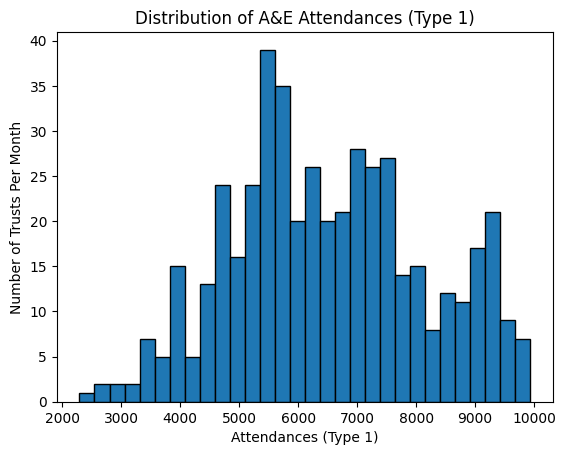

In [45]:
# we see an approximately normal distribution, slightly bimodal on the right

plt.hist(major_regions_means["A&E attendances Type 1"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Attendances (Type 1)")
plt.ylabel("Number of Trusts Per Month")
plt.title("Distribution of A&E Attendances (Type 1)")
plt.show()


In [46]:
aedata.columns

Index(['Period', 'Org Code', 'Parent Org', 'Org name',
       'A&E attendances Type 1', 'A&E attendances Type 2',
       'A&E attendances Other A&E Department', 'Attendances over 4hrs Type 1',
       'Attendances over 4hrs Type 2',
       'Attendances over 4hrs Other Department',
       'Patients who have waited 4-12 hs from DTA to admission (Covid-era)',
       'Patients who have waited 12+ hrs from DTA to admission (Covid-era)',
       'Emergency admissions via A&E - Type 1',
       'Emergency admissions via A&E - Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency admissions',
       'A&E attendances Booked Appointments Type 1 (Covid-era)',
       'A&E attendances Booked Appointments Type 2 (Covid-era)',
       'A&E attendances Booked Appointments Other Department (Covid-era)',
       'Attendances over 4hrs Booked Appointments Type 1 (Covid-era)',
       'Attendances over 4hrs Booked Appointments Type 2 (Covid-era)',
       'Attendances ove

In [47]:
# View over 4h attendances
major_regions_over_4h_means = major_regions_aedata.groupby(["Date","Parent Org"])['Attendances over 4hrs Type 1'].mean().reset_index()

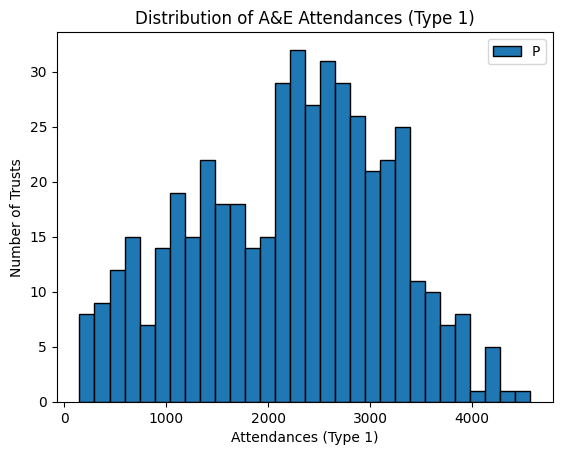

In [48]:
# histogram helps learners see how then number of attendances varies across trusts.
# we see an approximately normal distribution, slightly bimodal on the right

plt.hist(major_regions_over_4h_means['Attendances over 4hrs Type 1'].dropna(), bins=30, edgecolor="black")
plt.xlabel("Attendances (Type 1)")
plt.ylabel("Number of Trusts")
plt.title("Distribution of A&E Attendances (Type 1)")
plt.legend(labels = "Parent Org")
plt.show()


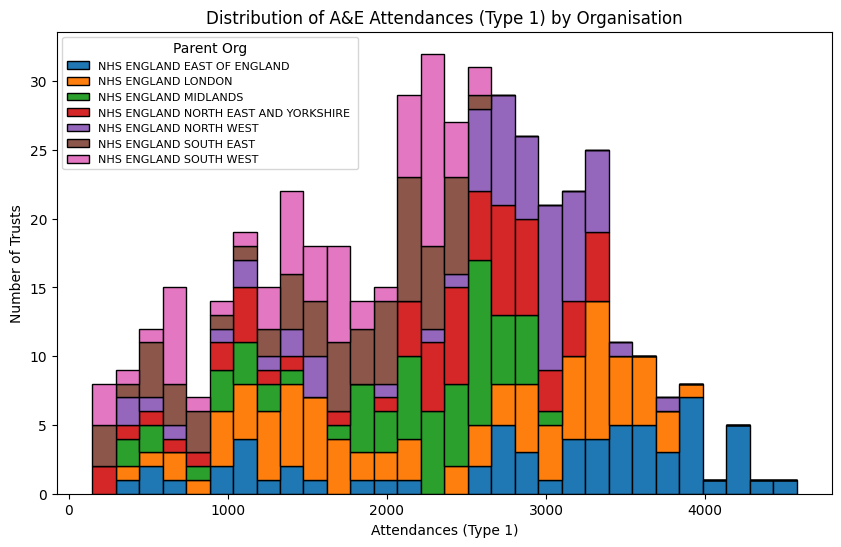

In [49]:
# Group by organisation
grouped = major_regions_over_4h_means.groupby("Parent Org")["Attendances over 4hrs Type 1"]

# Create a list of attendance arrays (one per org) and their labels
data = [group.dropna().values for name, group in grouped]
labels = [name for name, group in grouped]

plt.figure(figsize=(10,6))

# Plot stacked histogram with multiple colours
plt.hist(data, bins=30, stacked=True, edgecolor="black", label=labels)

plt.xlabel("Attendances (Type 1)")
plt.ylabel("Number of Trusts")
plt.title("Distribution of A&E Attendances (Type 1) by Organisation")
plt.legend(title="Parent Org", fontsize=8)
plt.show()


In [50]:
major_regions_aedata_winter_months.head()

NameError: name 'major_regions_aedata_winter_months' is not defined

In [ ]:
# Filtering your data for a specific trust allows you to see

major_regions_over_4h_means = major_regions_aedata.groupby(["Date","Parent Org"])['Attendances over 4hrs Type 1'].mean().reset_index()

major_regions_over_4h_means_filtered = major_regions_over_4h_means[major_regions_over_4h_means["Parent Org"] == "NHS ENGLAND LONDON"]

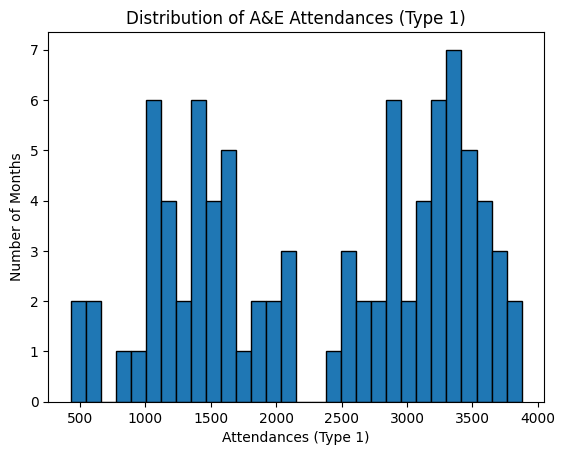

In [ ]:
# histogram helps learners see how then number of attendances varies across trusts.
# we see a strongly bimodal distriubution


plt.hist(major_regions_over_4h_means_filtered['Attendances over 4hrs Type 1'].dropna(), bins=30, edgecolor="black")
plt.xlabel("Attendances (Type 1)")
plt.ylabel("Number of Months")
plt.title("Distribution of A&E Attendances (Type 1)")
plt.show()

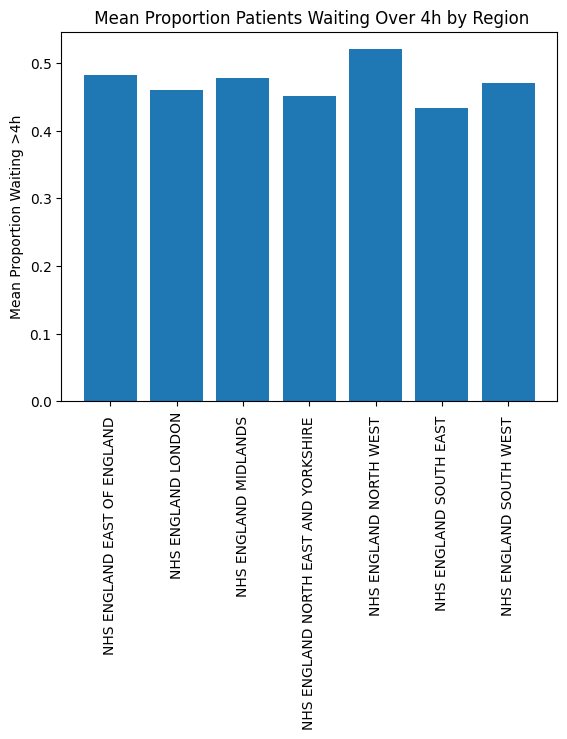

In [ ]:
df_grouped = major_regions_aedata.groupby(["Parent Org", "Date"])["Proportion Waiting over 4h"].mean().reset_index()

plt.bar(df_grouped["Parent Org"], df_grouped["Proportion Waiting over 4h"])
plt.ylabel("Mean Proportion Waiting >4h")
plt.title(" Mean Proportion Patients Waiting Over 4h by Region")
plt.xticks(rotation=90)
plt.show()

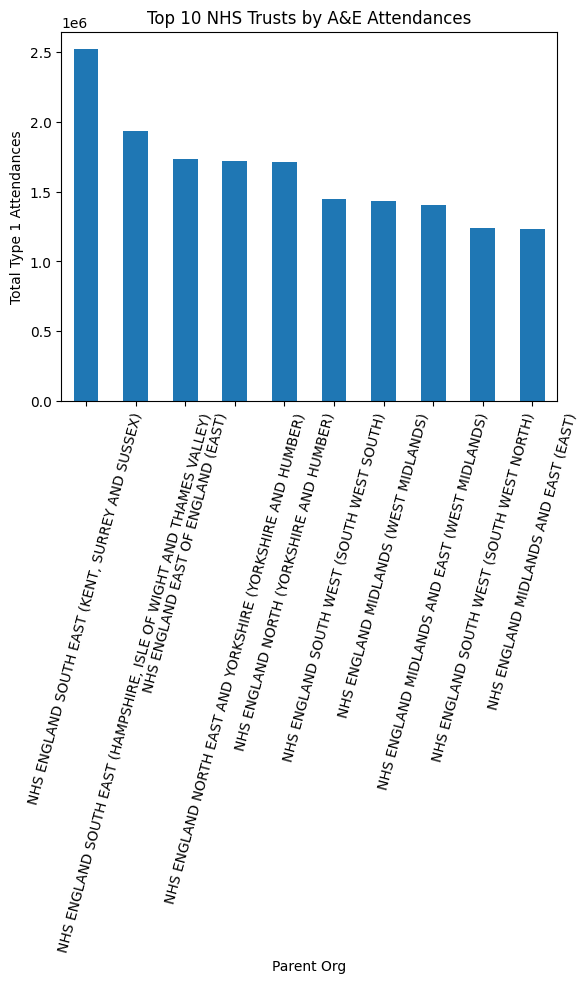

In [ ]:
top10 = (sub_regions_aedata.groupby("Parent Org")["A&E attendances Type 1"]
           .sum()
           .sort_values(ascending=False)
           .head(10))

top10.plot(kind="bar")
plt.ylabel("Total Type 1 Attendances")
plt.title("Top 10 NHS Trusts by A&E Attendances")
plt.xticks(rotation=75)
plt.show()


/tmp/ipython-input-2239147473.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2239147473.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



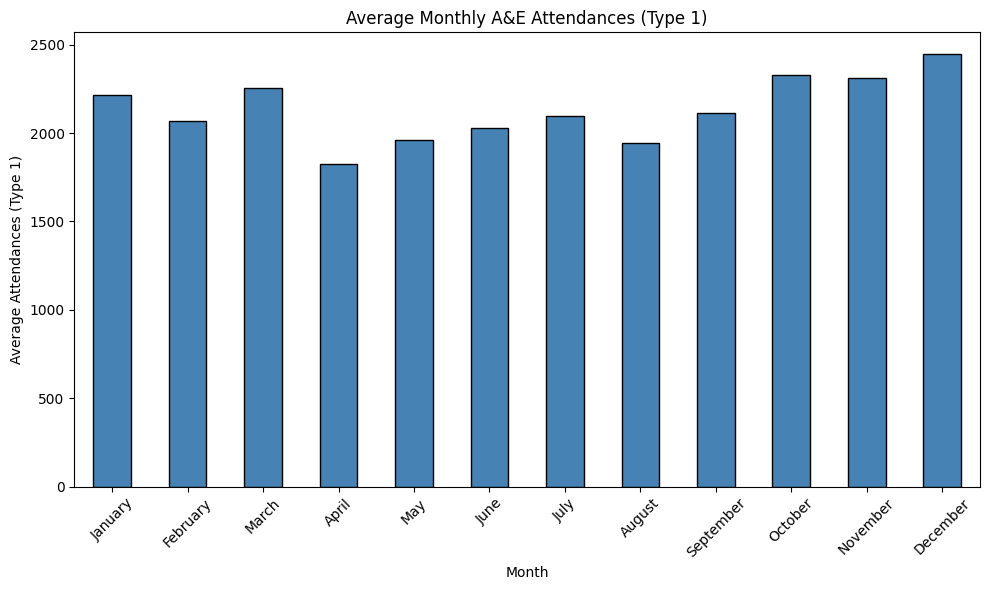

In [ ]:
# Make sure Date is datetime
major_regions_aedata["Date"] = pd.to_datetime(major_regions_aedata["Date"], errors="coerce")

# Extract month names
major_regions_aedata["Month"] = major_regions_aedata["Date"].dt.month_name()

# Group by month number to keep order + calculate mean attendances
monthly_attendances = (
    major_regions_aedata
    .groupby(major_regions_aedata["Date"].dt.month)["Attendances over 4hrs Type 1"]
    .mean()   # or .sum() depending on what you want
)

# Replace index with month names for plotting
monthly_attendances.index = pd.to_datetime(monthly_attendances.index, format="%m").month_name()


plt.figure(figsize=(10,6))
monthly_attendances.plot(kind="bar", color="steelblue", edgecolor="black")

plt.xlabel("Month")
plt.ylabel("Average Attendances (Type 1)")
plt.title("Average Monthly A&E Attendances (Type 1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


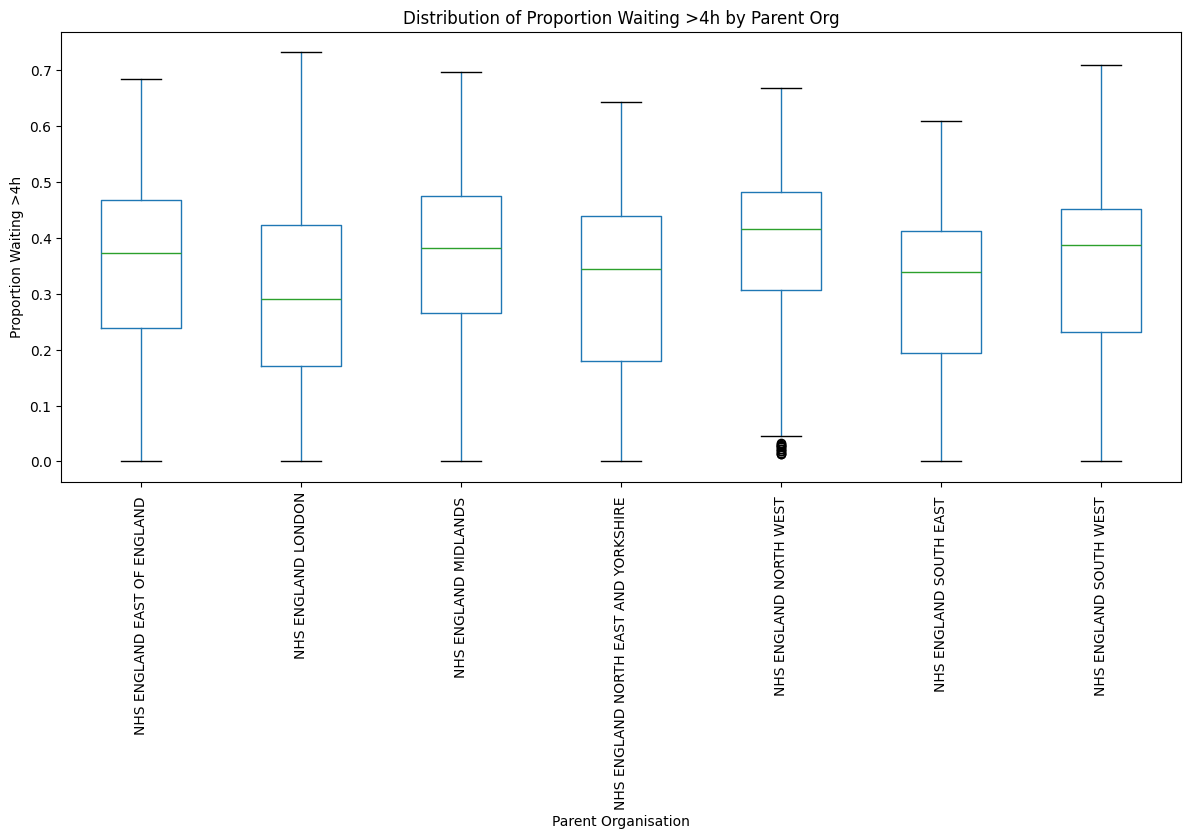

In [ ]:
# One box per Parent Org
major_regions_aedata.boxplot(
    column="Proportion Waiting over 4h",
    by="Parent Org",
    grid=False,
    rot=90,          # rotate labels so they fit
    figsize=(14,6)
)

plt.title("Distribution of Proportion Waiting >4h by Parent Org")
plt.suptitle("")   # remove the default pandas title
plt.ylabel("Proportion Waiting >4h")
plt.xlabel("Parent Organisation")
plt.show()

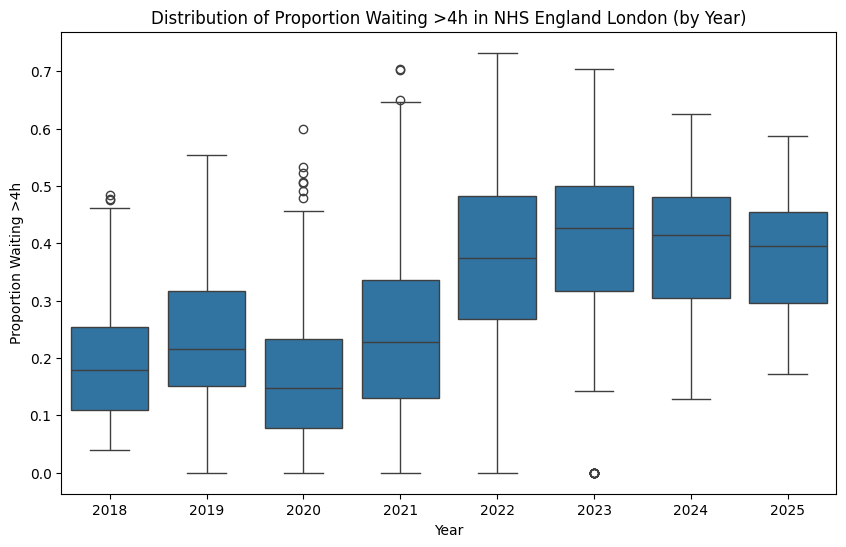

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for London
london = major_regions_aedata[major_regions_aedata["Parent Org"] == "NHS ENGLAND LONDON"].copy()

london["Year"] = london["Year"].astype(int)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=london,
    x="Year",
    y="Proportion Waiting over 4h"
)
plt.title("Distribution of Proportion Waiting >4h in NHS England London (by Year)")
plt.xlabel("Year")
plt.ylabel("Proportion Waiting >4h")
plt.show()


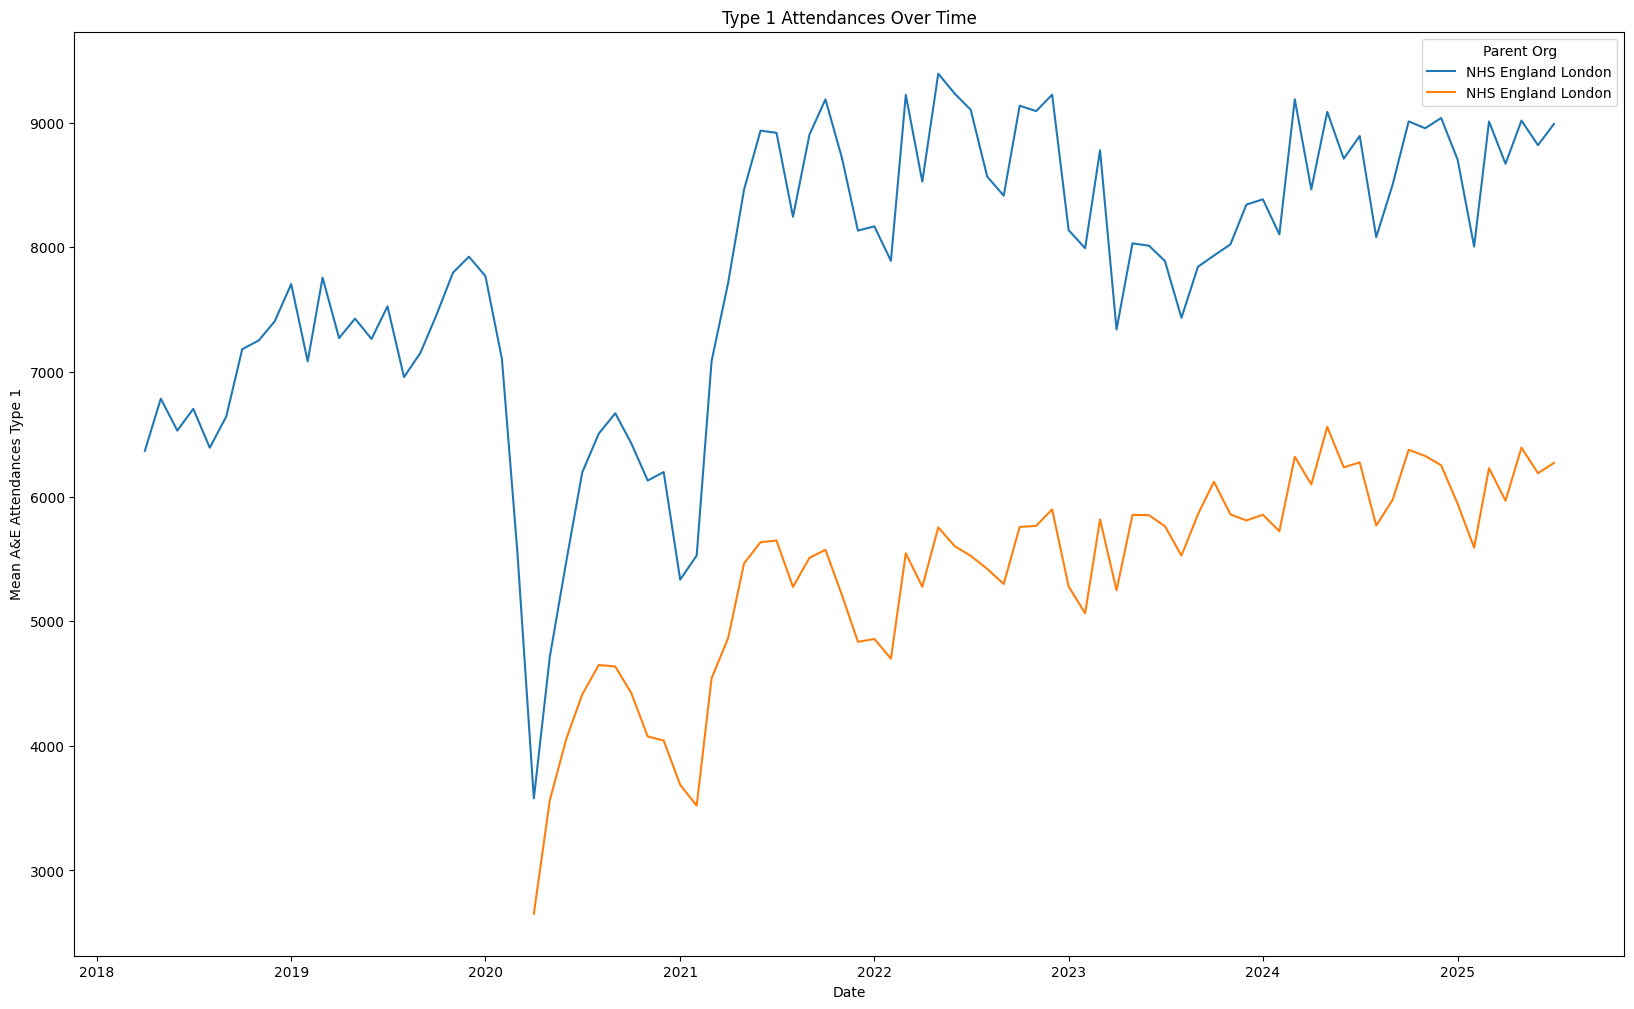

In [ ]:
import matplotlib.pyplot as plt

# Group by Date and Parent Org and calculate mean
# Reset index so that Date and Parent Org are columns
major_regions_means = (
    major_regions_aedata
    .groupby(["Date", "Parent Org"])["A&E attendances Type 1"]
    .mean()
    .reset_index()
)


plt.figure(figsize=(20, 12))

# Plot one line per Parent Org using a For Loop

london_subset = major_regions_means[major_regions_means["Parent Org"] == "NHS ENGLAND LONDON"]
midlands_subset = major_regions_means[major_regions_means["Parent Org"] == "NHS ENGLAND MIDLANDS "]

# add to the plot as a seriesmanually
plt.plot(london_subset["Date"], london_subset["A&E attendances Type 1"], label="NHS England London")
plt.plot(midlands_subset["Date"], midlands_subset["A&E attendances Type 1"], label="NHS England London")

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Mean A&E Attendances Type 1")
plt.title("Type 1 Attendances Over Time")

plt.legend(title="Parent Org")

# Finish by showing the plot
plt.show()


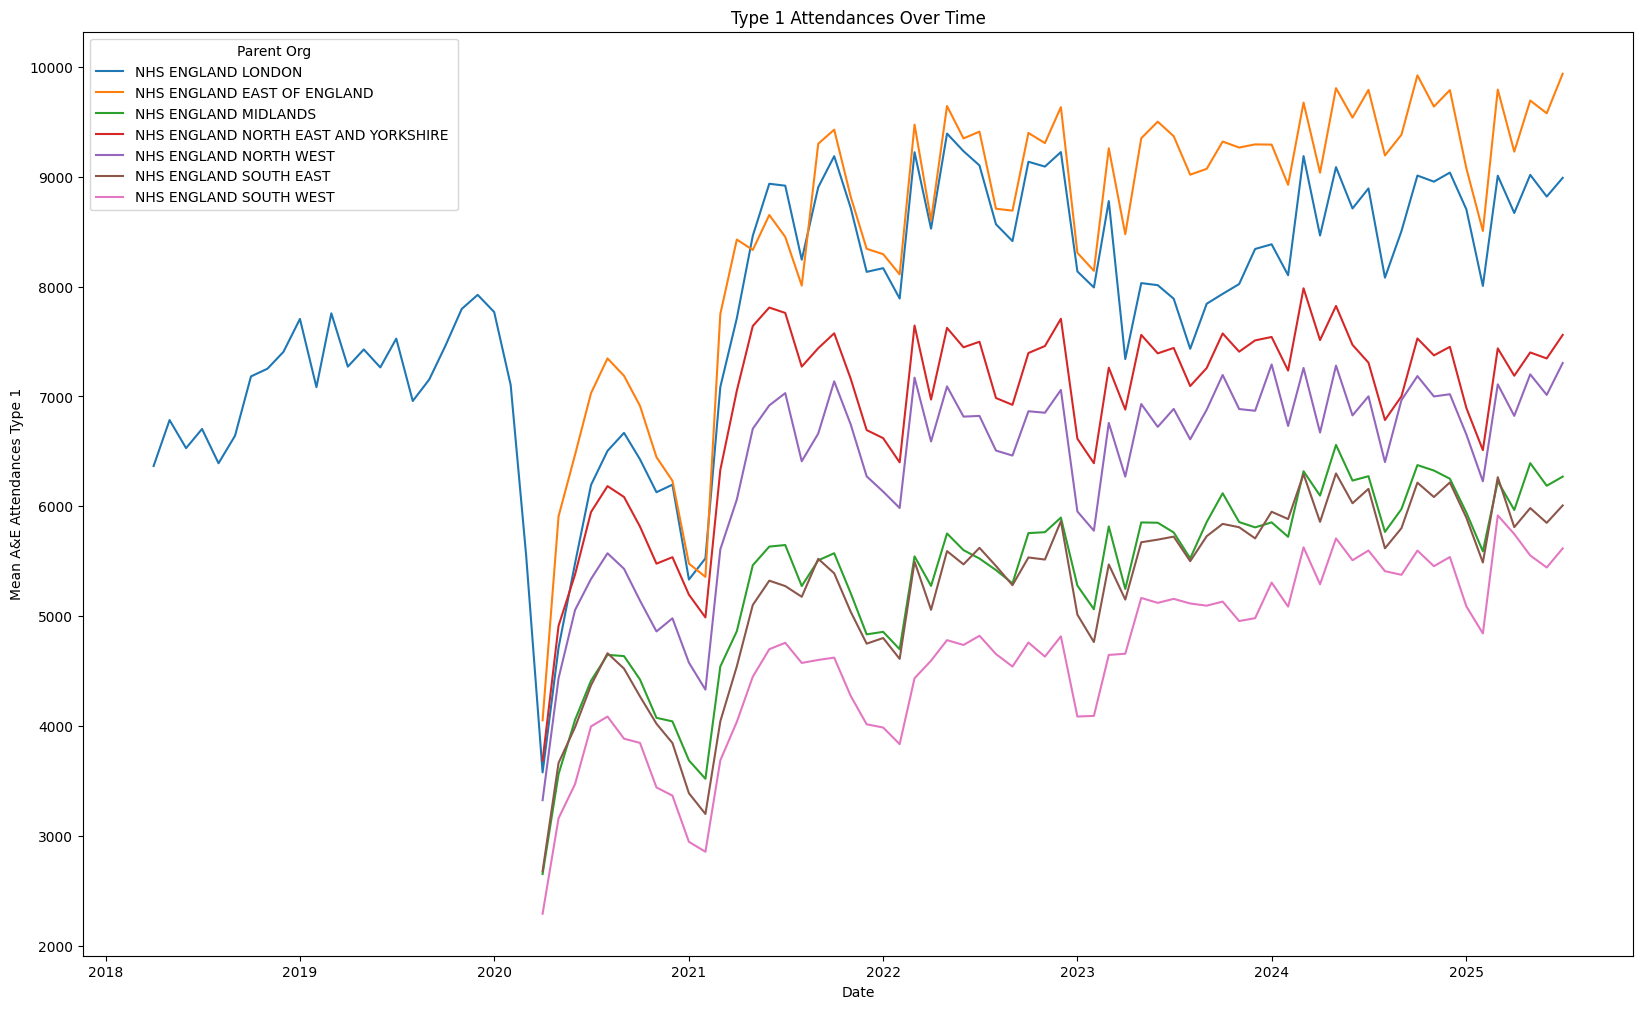

In [ ]:
# Group by Date and Parent Org and calculate mean
# Reset index so that Date and Parent Org are columns
major_regions_means = (
    major_regions_aedata
    .groupby(["Date", "Parent Org"])["A&E attendances Type 1"]
    .mean()
    .reset_index()
)


plt.figure(figsize=(20, 12))

# Plot one line per Parent Org using a For Loop
for org in major_regions_means["Parent Org"].unique():
    # Define a subset of the data
    subset = major_regions_means[major_regions_means["Parent Org"] == org]
    # add to the plot as a series
    plt.plot(subset["Date"], subset["A&E attendances Type 1"], label=org)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Mean A&E Attendances Type 1")
plt.title("Type 1 Attendances Over Time")

plt.legend(title="Parent Org")

# Finish by showing the plot
plt.show()


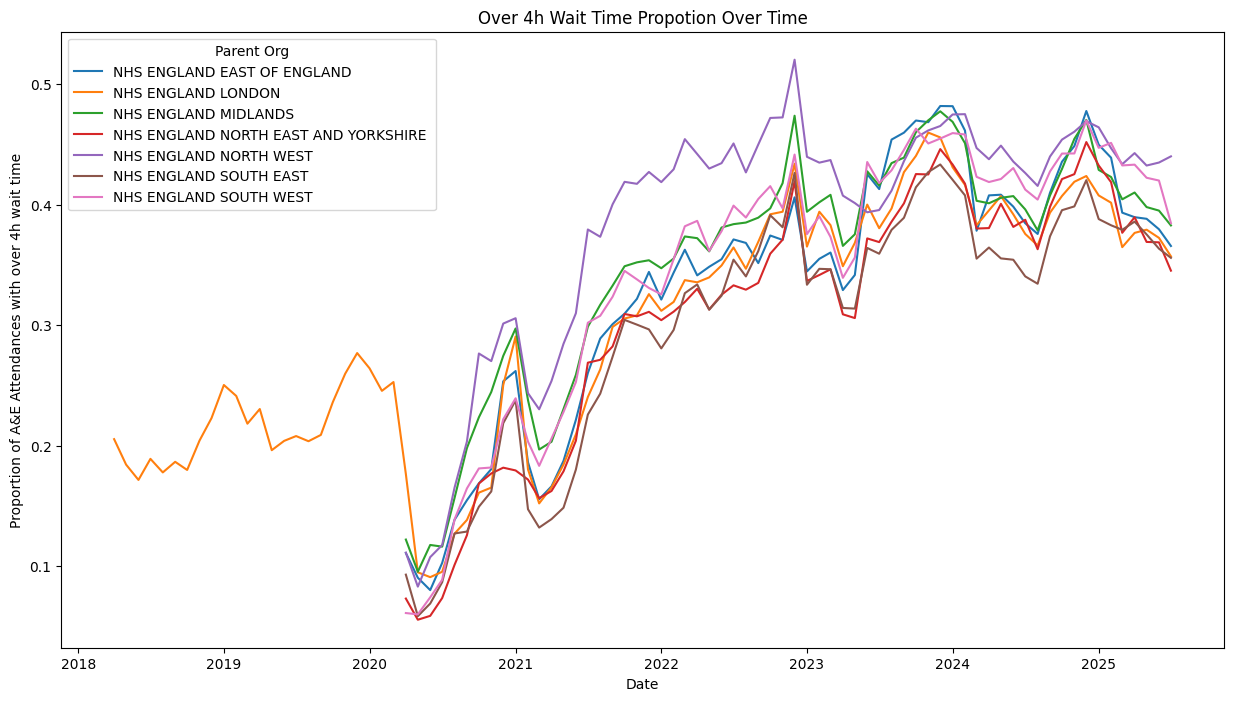

In [ ]:
df_over_4h_grouped = major_regions_aedata.groupby(["Parent Org", "Date"])["Proportion Waiting over 4h"].mean().reset_index()

plt.figure(figsize = (15,8))

# Plot one line per Parent Org using a For Loop
for org in df_over_4h_grouped["Parent Org"].unique():
    # Define a subset of the data
    subset = df_over_4h_grouped[df_over_4h_grouped["Parent Org"] == org]
    # add to the plot as a series
    plt.plot(subset["Date"], subset["Proportion Waiting over 4h"], label=org)


# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Proportion of A&E Attendances with over 4h wait time")
plt.title("Over 4h Wait Time Propotion Over Time")

plt.legend(title="Parent Org")

# PREVIEW: Advanced Analytics Using Seasonal Decomposition

Goal of Seasonal Decomposition: splitting time series data into several components.
* **Trend** (average value over time) T(t)
* **Seasonality** - average values throughout a set frequency - S(t)
* **Error** - the remaining component that cannot be explained by trend and seasonality. - E(t)

*Note: We can try to use **external regressors** to model the remaining error term in forecasting.*

*Error should have a random shape; if there is any pattern then this should have been picked up in the seasonality and trend.*

### Multiplicative and Additive Seasonality
* **Additive seasonality:**
* y(t) = T(t) + S(t) + E(t)
* When speaking about absolute values, then we see additive seasonality.

* **Multiplicative seasonality:**
* y(t) = T(t) * S(t) * E(t)
* When speaking in terms of percentages, then we see multiplicative seasonality.

**Seasonal Decomposition in Python:**

* Uses the widely used statsmodels library.


In [ ]:
# seasonal decomposiion package
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

# graphing package
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Making a seasonal decomposition plot function utility function
# modfied code based on https://gist.github.com/tomron/8798256fcee5438edd58c17654adf443

def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )

# Utility function that allows us to return just one part of the seasonal decomposition
def plot_sd_element(series, dates, title):
    graph = fig.add_trace(go.Scatter(x=dates, y=series, mode="lines", name=title))
    fig.update_layout(title = title)
    fig.show()
    return graph

## Seasonal Decomposition: Overall A and E attendances

In [ ]:
# Creating an aggregated dataset so that there is one, national-level metric (mean) per period.

aedata_mean = aedata.groupby("Date")[['A&E attendances Type 1', 'Attendances over 4hrs Type 1',  'Emergency admissions via A&E - Type 1']].agg("mean")

aedata_sum = aedata.groupby("Date")[['A&E attendances Type 1', 'Attendances over 4hrs Type 1',  'Emergency admissions via A&E - Type 1']].agg("sum")

In [ ]:
ae_att_type1_decomp = seasonal_decompose(x = aedata_mean['A&E attendances Type 1'], model = 'additive', period = 12)
fig = plot_seasonal_decompose(ae_att_type1_decomp, dates = major_regions_aedata.index)
fig.show()